## Installations

In [1]:
!pip install qiskit
!pip install qiskit_aer


## Imports



In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import math
import qiskit_aer.noise as noise

## Background

### SWAP test

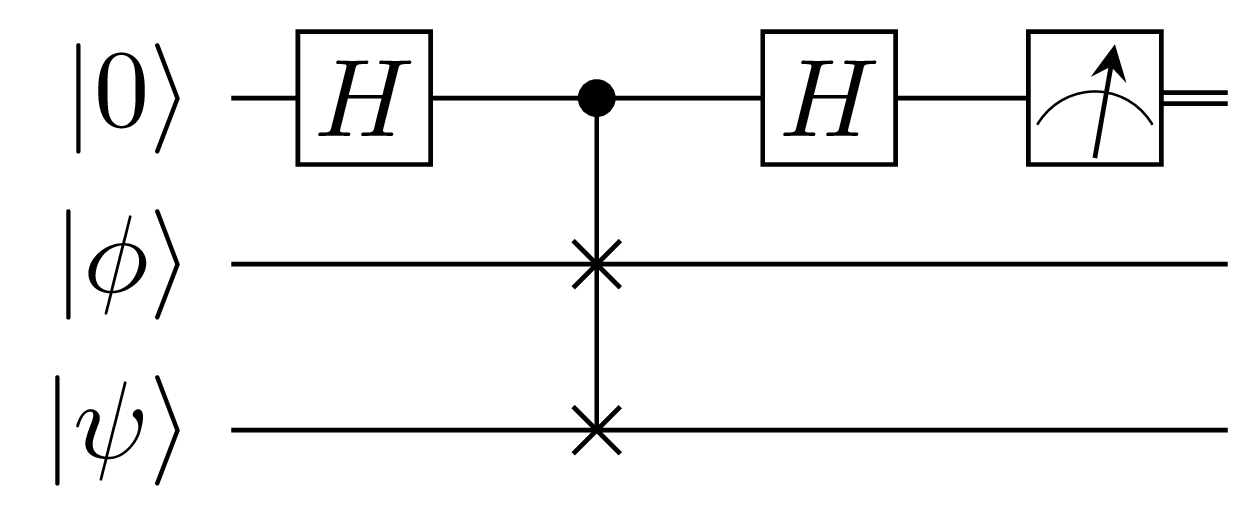

[Source](https://en.wikipedia.org/wiki/Swap_test)

### SWAP TEST and similarity

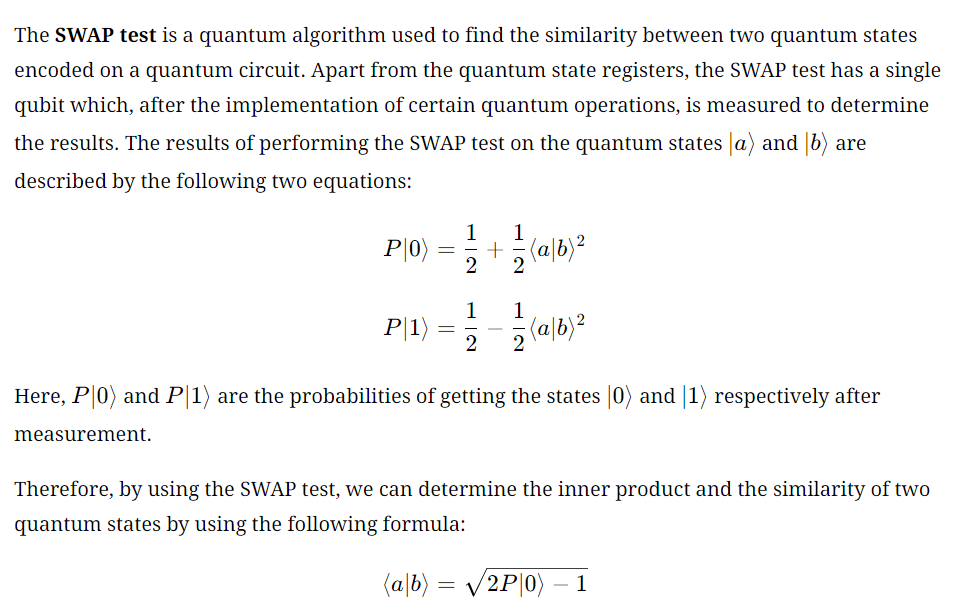

 [Source](https://www.educative.io/projects/find-the-inner-product-of-two-quantum-states-using-the-swap-test)

## Defining Function(s)

In [3]:
def SwapTestCircuit(State1=[1,0],State2=[1,0]) :

  if len(State1)!=len(State2) :
    raise Exception("Invalid : Lists are not of same size")
  n = math.log2(len(State1))
  if math.floor(n)!= n :
    raise Exception("Invalid : List is not of proper size")
  #Exception in case states are not normalised
  if np.linalg.norm(State1)!=1 or np.linalg.norm(State1)!=1 :
    raise Exception("Invalid : States are not normalised")

  # Defining no of qubits needed to represent each state
  n = int(n)

  #Initialising the circuit -> Qubit 0 is Ancilla
  SwapCircuit = QuantumCircuit(2*n+1,1)

  SwapCircuit.h(0)
  SwapCircuit.initialize(State1, list(range(1,n+1,1)))
  SwapCircuit.initialize(State2, list(range(n+1,2*n+1,1)))

  SwapCircuit.barrier()

  # Applying CSwaps
  for i in range(n) :
    SwapCircuit.cswap(0,1+i,n+1+i)

  SwapCircuit.h(0)
  SwapCircuit.barrier()
  # Measurement of Qubit 0
  SwapCircuit.measure(0,0)

  return SwapCircuit

In [4]:
def CalculateSimilarity(Circuit,ErrorRate,shots = 2000) :

  # Converting Probabiity to error
  Error1 = noise.depolarizing_error(ErrorRate, 1) #For single qubit gates
  Error3 = noise.depolarizing_error(ErrorRate, 3) #For three qubit gates

  # Creating Noise model
  noise_model = noise.NoiseModel()
  noise_model.add_quantum_error(Error1, ['h'],[0])
  noise_model.add_all_qubit_quantum_error(Error3, ['cswap'])

  # Running the circuit
  result = execute(Circuit.copy(), Aer.get_backend('qasm_simulator'), noise_model=noise_model, shots=20000).result()
  counts = result.get_counts(0)

  # Finding Inner product from results
  ProbabilityZero = counts['0']/(counts['0']+counts['1'])
  InnerProduct = pow(2*ProbabilityZero-1,0.5)
  return InnerProduct

In [5]:
def Plot(State1,State2,StepSize) :

  Circuit=SwapTestCircuit(State1,State2)
  X=[]
  Y=[]
  BaseLine=CalculateSimilarity(Circuit.copy(),0)
  Steps = int(np.floor((0.50-0.01)/StepSize))
  error = 0.01
  for i in range(Steps) :
    Product = CalculateSimilarity(Circuit.copy(),error)
    X.append(error)
    Y.append(Product)
    error = error + StepSize

  return X,Y,BaseLine


## Execution


In [8]:
StepSize = 0.04

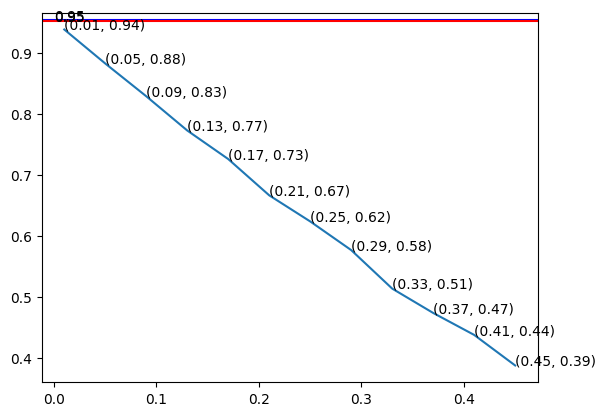

In [9]:
# Question 1

State1 = [pow(0.3,0.5),pow(0.7,0.5)]
State2 = [pow(0.6,0.5),pow(0.4,0.5)]

Theoretical = np.dot(State1,State2)

X,Y,BaseLine = Plot(State1,State2,StepSize)

plt.plot(X,Y)
[plt.text(i, j, f'({round(i,2)}, {round(j,2)})') for (i, j) in zip(X, Y)]

plt.axhline(y = Theoretical, color = 'b', linestyle = '-',label="Theoretical")
plt.text(0,Theoretical,round(Theoretical,2))
plt.axhline(y = BaseLine, color = 'r', linestyle = '-',label="Zero Error")
plt.text(0,BaseLine,round(BaseLine,2))

plt.show()

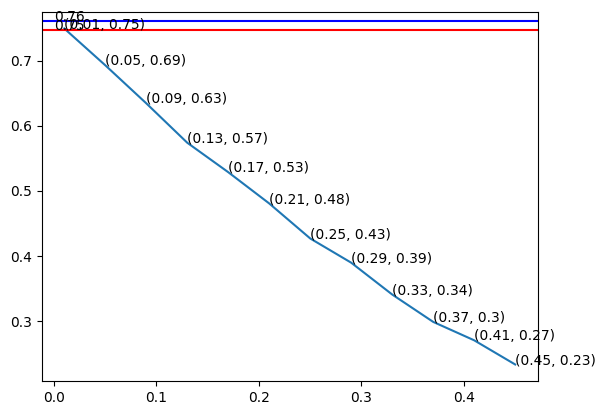

In [10]:
# Question 2

State1 = [pow(0.1,0.5),pow(0.2,0.5),pow(0.6,0.5),pow(0.1,0.5)]
State2 = [pow(0.0,0.5),pow(0.5,0.5),pow(0.1,0.5),pow(0.4,0.5)]

Theoretical = np.dot(State1,State2)

X,Y,BaseLine = Plot(State1,State2,StepSize)

plt.plot(X,Y)
[plt.text(i, j, f'({round(i,2)}, {round(j,2)})') for (i, j) in zip(X, Y)]

plt.axhline(y = Theoretical, color = 'b', linestyle = '-',label="Theoretical")
plt.text(0,Theoretical,round(Theoretical,2))
plt.axhline(y = BaseLine, color = 'r', linestyle = '-',label="Zero Error")
plt.text(0,BaseLine,round(BaseLine,2))

plt.show()

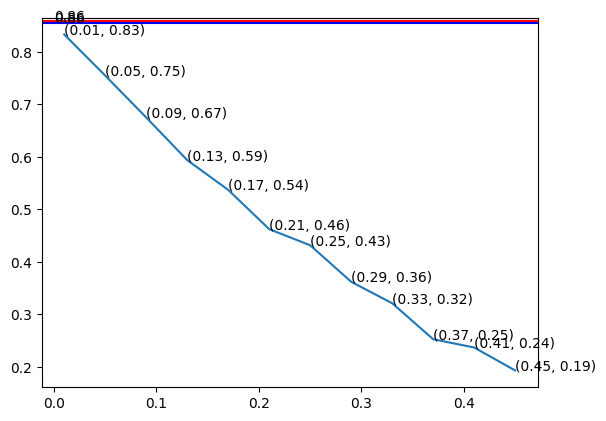

In [11]:
# Question 3

State1 = [pow(0.01,0.5),pow(0.10,0.5),pow(0.12,0.5),pow(0.13,0.5),pow(0.04,0.5),pow(0.00,0.5),pow(0.35,0.5),pow(0.25,0.5)]
State2 = [pow(0.00,0.5),pow(0.20,0.5),pow(0.20,0.5),pow(0.10,0.5),pow(0.20,0.5),pow(0.05,0.5),pow(0.05,0.5),pow(0.20,0.5)]

Theoretical = np.dot(State1,State2)

X,Y,BaseLine = Plot(State1,State2,StepSize)

plt.plot(X,Y)
[plt.text(i, j, f'({round(i,2)}, {round(j,2)})') for (i, j) in zip(X, Y)]

plt.axhline(y = Theoretical, color = 'b', linestyle = '-',label="Theoretical")
plt.text(0,Theoretical,round(Theoretical,2))
plt.axhline(y = BaseLine, color = 'r', linestyle = '-',label="Zero Error")
plt.text(0,BaseLine,round(BaseLine,2))

plt.show()

## Conclusions

**In conclusion we can say that as Error increases the inner product or similarity reduces irrespective of the examples used here and it approaches 0 as depolarising error approaches 0.5**

**No of gates used to compare 2 n-qubit states is n+2 (2 H gates and n CSwap gates)  (without any Error correction and both are available directly)**

**We can also say that as error increases we are doing an equivalent of applying test on arbitary 2 states and hence similarity or dot product tends to become low as error increases**

**Another Conclusion is that even slight error affects the dot product significantly and hence error should be minimised to extremely low levels for relevant results**

### Misc

*   Shots = 2000
*   No error correction or mitigation techniques applied
*   Assumed CSwap and H gates are available as basis else Transpile must be applied before execution
* Circuit was executed on Qasm Simulator - Running on real devices might affect as it introduces other types of error too - we have only applied depolarising error